## Sena İrem Toka 090190361

In [27]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from scipy.io import loadmat
from numpy.random import randint
from scipy.io import loadmat
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns

InteractiveShell.ast_node_interactivity = "all"

## Q1

Consider the wheel graph on 7 vertices below. Assume each triangle is equilateral, or use [the graph distance](https://mathworld.wolfram.com/GraphDistance.html).

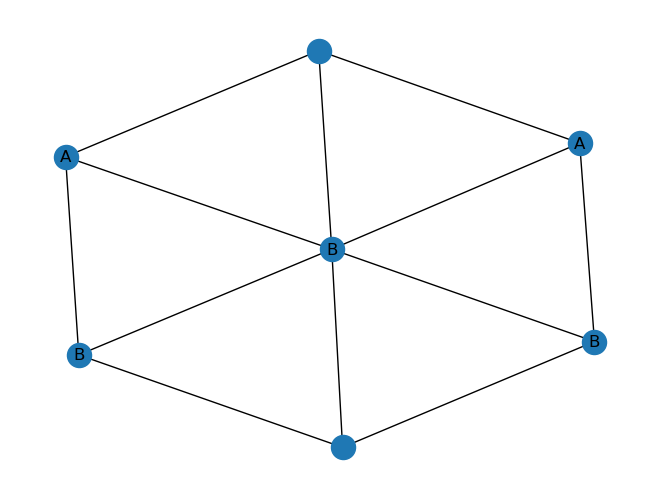

In [5]:
G = nx.wheel_graph(7)
pos = nx.spring_layout(G)
nx.draw(G,pos)
labels = {x: y for x,y in enumerate(['B','A','B','','B','A',''])}
res = nx.draw_networkx_labels(G,pos,labels)

1. Apply the k-NN algorithm by hand with $k=1$ to fill-in the missing labels. You must explain why you gave the specific label.

#### Since the triangles are equilateral, the missing label on the upside of the graph, with 2 A neighbors and 1 B neighbor can be both A or B in the case of k=1. This means if we run this algorithm more than once it can come out as A in one run and B in another run randomly. For the missing label on the downside of the graph with 3 B neighbors closest to it, it can only be B when k=1. Because in every run, since the distances are the same, the outcome can only be B even though the node chosen might change.

2. This time apply the k-NN by hand again with $k=3$ to fill-in the missing labels. Again, you must explain why you gave the specific label.

#### For k=3 the missing label on the upside of the graph, will be labeles as A. Since its 3 nearest neighbors are 2 A's and 1 B, and we take majority out the 3. As for the the missing label on the downside of the graph, all of its 3 closest neighbors are B's. Therefore it is labeled as B.

3. Apply k-means algorithm by hand with k=2. Use the unlabeled points as the initial centroids. 

#### We take every point and measure its distance to the two centroids, then assign it to the closest centroid. 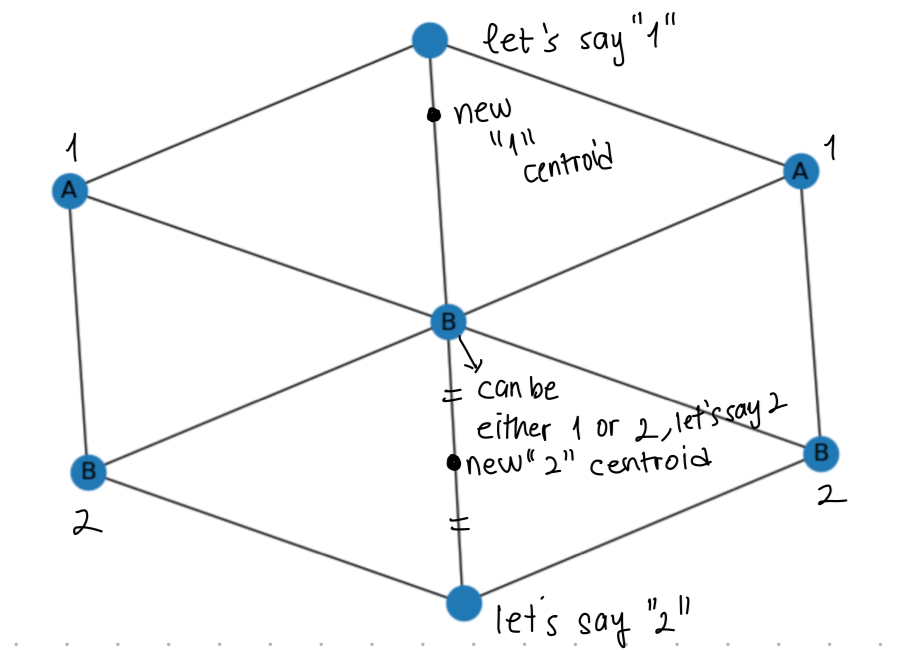

4. What happens with the central vertex? What are the centroids after the first run? Notice that if we randomly assign the central vertex, it affects the subsequent iterations.

#### The central vertex is assigned randomly to 1 or 2, as I arbitrarily named the centroids above, since it is equally close to the chosen centroids. This changes the places of the centroids for the next iteration as the next set of centroids are found by getting the mean of the existing members of each cluster. 

5. Verify that iterations stabilize after first run.

#### Iterations stabilize after the first run because all nodes are already assigned to the closest centroid, regardless of what we initially assigned to the central vertex.  

6. What happens if we change the initial centroids? Explain.

#### If we change the initial centroids to be too close to each other for example, the clustering algorithm wouldn't classify the nodes the way it did above. Therefore non-similar nodes might end up at the same cluster. 

## Q2


In [6]:
image = loadmat('/Users/senairemtoka/Downloads/PaviaU.mat')['paviaU']
gt = loadmat('/Users/senairemtoka/Downloads/PaviaU_gt.mat')['paviaU_gt']

The dataset is a hyperspectral image collected by the ROSIS sensor over Pavia, nothern Italy. The image is 610 x 340 pixels, and the number of spectral bands is 103, but some of the samples in the images contain no information and have to be discarded before the analysis. Image groundtruth differentiates 9 classes.

* asphalt (1)
* meadows (2)
* gravel (3)
* trees (4)
* painted metal (5)
* soil (6)
* bitumen (7)
* bricks (8)
* shadows (9)

In [7]:
image.shape
gt.shape

(610, 340, 103)

(610, 340)

Notice that each pixel $(i,j)$ contains a 103-dimensional vector $p_{i,j}$.

In [8]:
i = randint(610)
j = randint(340)
image[i,j]

array([ 784,  619,  391,  270,  381,  481,  602,  666,  692,  671,  579,
        482,  463,  499,  500,  496,  490,  520,  539,  541,  582,  630,
        648,  663,  708,  745,  787,  810,  795,  796,  805,  815,  799,
        771,  749,  721,  693,  679,  684,  686,  673,  648,  644,  654,
        669,  665,  645,  624,  610,  599,  591,  565,  571,  573,  540,
        513,  513,  508,  498,  488,  483,  486,  495,  514,  548,  606,
        696,  804,  961, 1159, 1349, 1539, 1754, 1975, 2227, 2500, 2748,
       2949, 3084, 3158, 3231, 3263, 3215, 3236, 3398, 3437, 3430, 3426,
       3419, 3414, 3412, 3426, 3425, 3405, 3380, 3349, 3303, 3296, 3277,
       3217, 3233, 3303, 3288], dtype=uint16)

We are going to write k-NN models to associate a class label 1 to 9 as above to the pixel in the image, and measure the accuracy of the model.

1. Split the dataset into train and test. Use 90% of the data for training, and the remaining 10% for test. We are going to use *accuracy* which is calculated the ration of the number of correctly labelled points by the total number of pixels.

2. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance
$ d((i,j),(i',j')) = max(|i-i'|,|j-j'|) $. Decide which $k$ yields the best result.

3. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance $d((i,j),(i',j')) = \| p_{i,j} - p_{i',j'} \|$ where $\|\cdot\|$ denotes the Euclidean norm of a vector. Decide which $k$ yields the best results.

##### Reshaping and flattening the image and gt so that image turns into a 2-D array and gt turns into a 1-D array. Then splitting the dataset for training and testing. 

In [10]:
X = image.reshape(-1, image.shape[2])
y = gt.flatten()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify= y)


In [16]:
k_values = [1, 3, 5, 7, 9]
best_accuracy = 0
best_k = None
best_metric = None
best_model = None
distance_metrics = ['manhattan', 'euclidean']

##### The KNN classifier has the metrics as function input as manhattan distance and euclidian distance, therefore I implemented both metrics for all the k values in for loops. 


##### For both metrics, k=9 came out to be the most accurate. Which makes sense to have more reference points giving a better accuracy although there are no drastic accuracy differences between the k values. 

In [17]:
for metric in distance_metrics:
    for k in k_values:
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"k={k}, Metric={metric.capitalize()}, Accuracy={accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_metric = metric
            best_model = knn_classifier

print(f"Best model - k={best_k}, Metric={best_metric.capitalize()}, Accuracy={best_accuracy}")

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

k=1, Metric=Manhattan, Accuracy=0.8068466730954676


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

k=3, Metric=Manhattan, Accuracy=0.8379942140790743


KNeighborsClassifier(metric='manhattan')

k=5, Metric=Manhattan, Accuracy=0.8441176470588235


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

k=7, Metric=Manhattan, Accuracy=0.8447926711668274


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

k=9, Metric=Manhattan, Accuracy=0.8467213114754099


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

k=1, Metric=Euclidean, Accuracy=0.7975409836065573


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

k=3, Metric=Euclidean, Accuracy=0.8234811957569913


KNeighborsClassifier(metric='euclidean')

k=5, Metric=Euclidean, Accuracy=0.8315814850530376


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

k=7, Metric=Euclidean, Accuracy=0.8360655737704918


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

k=9, Metric=Euclidean, Accuracy=0.8383317261330762
Best model - k=9, Metric=Manhattan, Accuracy=0.8467213114754099


## Q3

Consider [Individual household electric power consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) dataset from the UCI data repository:

In [18]:
electric = fetch_ucirepo(id=235) 

/Users/senairemtoka/opt/anaconda3/lib/python3.8/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [19]:
X = electric['data']['features'].iloc[:,2:]
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


1. Clean the data. You may replace the missing values with 0.
2. Apply k-means algorithm to the data with $k=2,3,4,5$.
3. Project the data to the 2-dimensional plane using Linear Discriminant Analysis as I did in the class, with the labels you obtained in step 2 above.
4. Inspect the data with the labels you constructed in step 2. Do these clusters have a visible meaning? Analyze.

##### I cleaned the data and replaced possible missing values with 0 as stated in the question.

In [20]:
X = X.fillna(0)
X.replace('?', 0, inplace=True)
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


##### I applied the k means algorithm and the LDA projection as we did in the class. However, the projection does not work for k=2 because n_components cannot be larger than min(n_features, n_classes - 1). So we face with an error when k=2. Hence, I used k=3,4,5 for the model implementation.

KMeans(n_clusters=3, n_init='auto')

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Clustered Data')

Text(0.5, 0, 'LDA Component 1')

Text(0, 0.5, 'LDA Component 2')

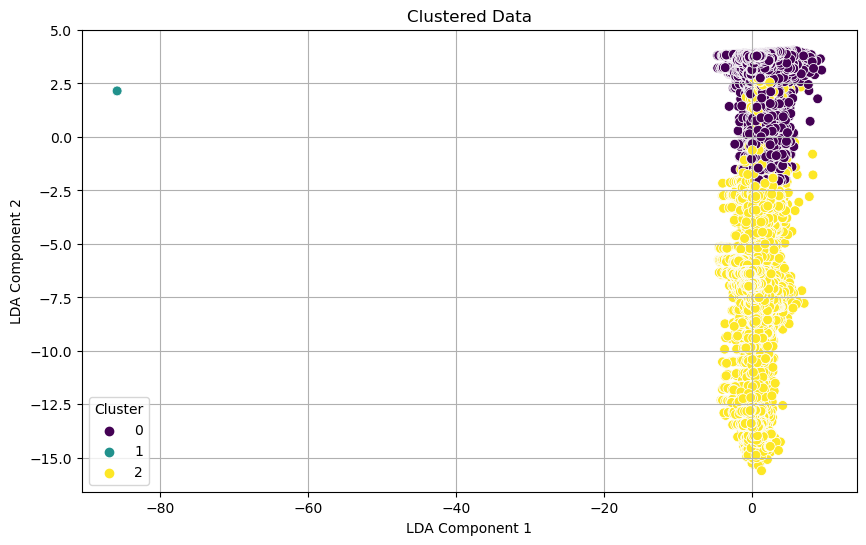

KMeans(n_clusters=4, n_init='auto')

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Clustered Data')

Text(0.5, 0, 'LDA Component 1')

Text(0, 0.5, 'LDA Component 2')

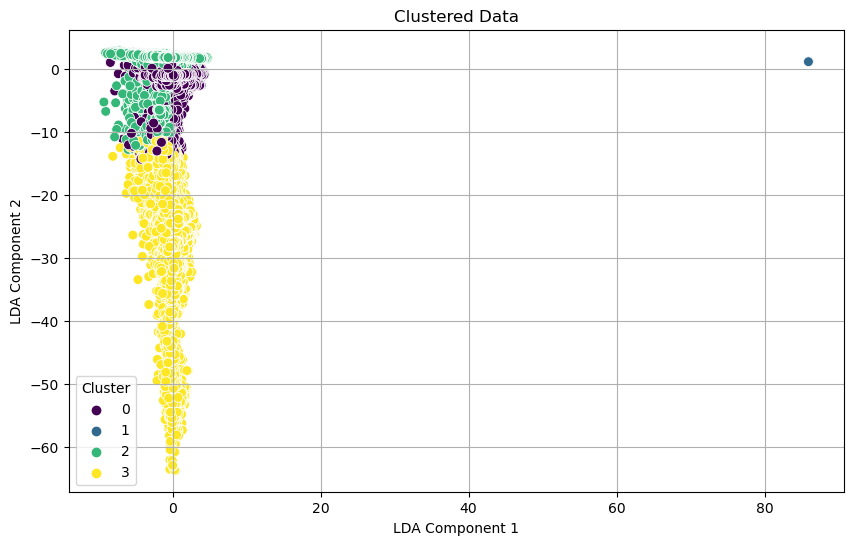

KMeans(n_clusters=5, n_init='auto')

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Clustered Data')

Text(0.5, 0, 'LDA Component 1')

Text(0, 0.5, 'LDA Component 2')

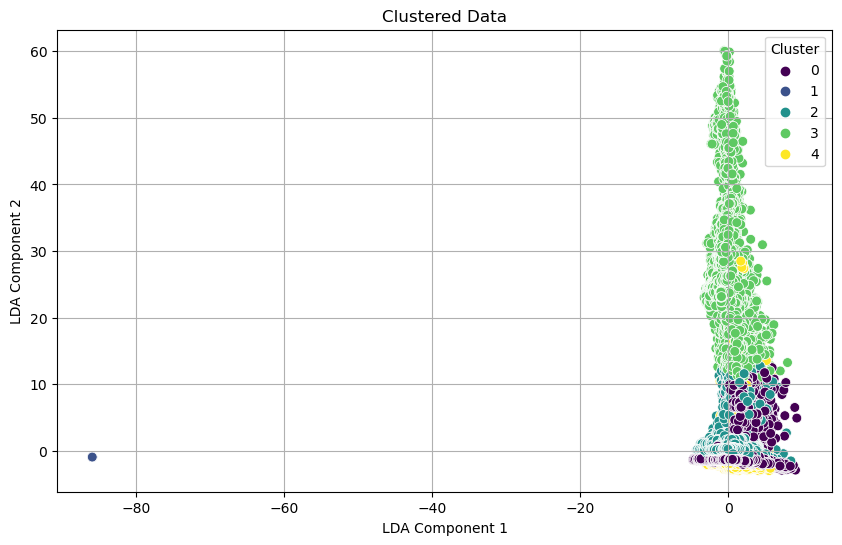

In [26]:
for k in range (3,6):
    model = KMeans(n_clusters=k, n_init='auto')

    model.fit(X)
    labels = model.predict(X)
    projection = LDA(n_components=2)
    res = projection.fit_transform(X,labels)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=res[:, 0], y=res[:, 1], hue=labels, palette='viridis', s=50)
    plt.title('Clustered Data')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

#### The conclusion that I was able to draw is that the points that go all the way along the y axis are all similar to each other, hence in all of the clustering models they classify in the same cluster. However, the densely populated part in the top for k=3 and 4 and in the bottom for k=5 in  the plots have differences. Therefore, the more clusters we create the more they go into different clusters. There is also one point which is always classified by itself and located away from the densely close points. With the LDA projection the scale and the numbers along the axes may vary so in the plots, the data points are located on the different parts of the graph.

I only used chatgpt to figure out that I needed to flatten and reshape the 'image' and 'gt'. So I am adding the screenshots below. 

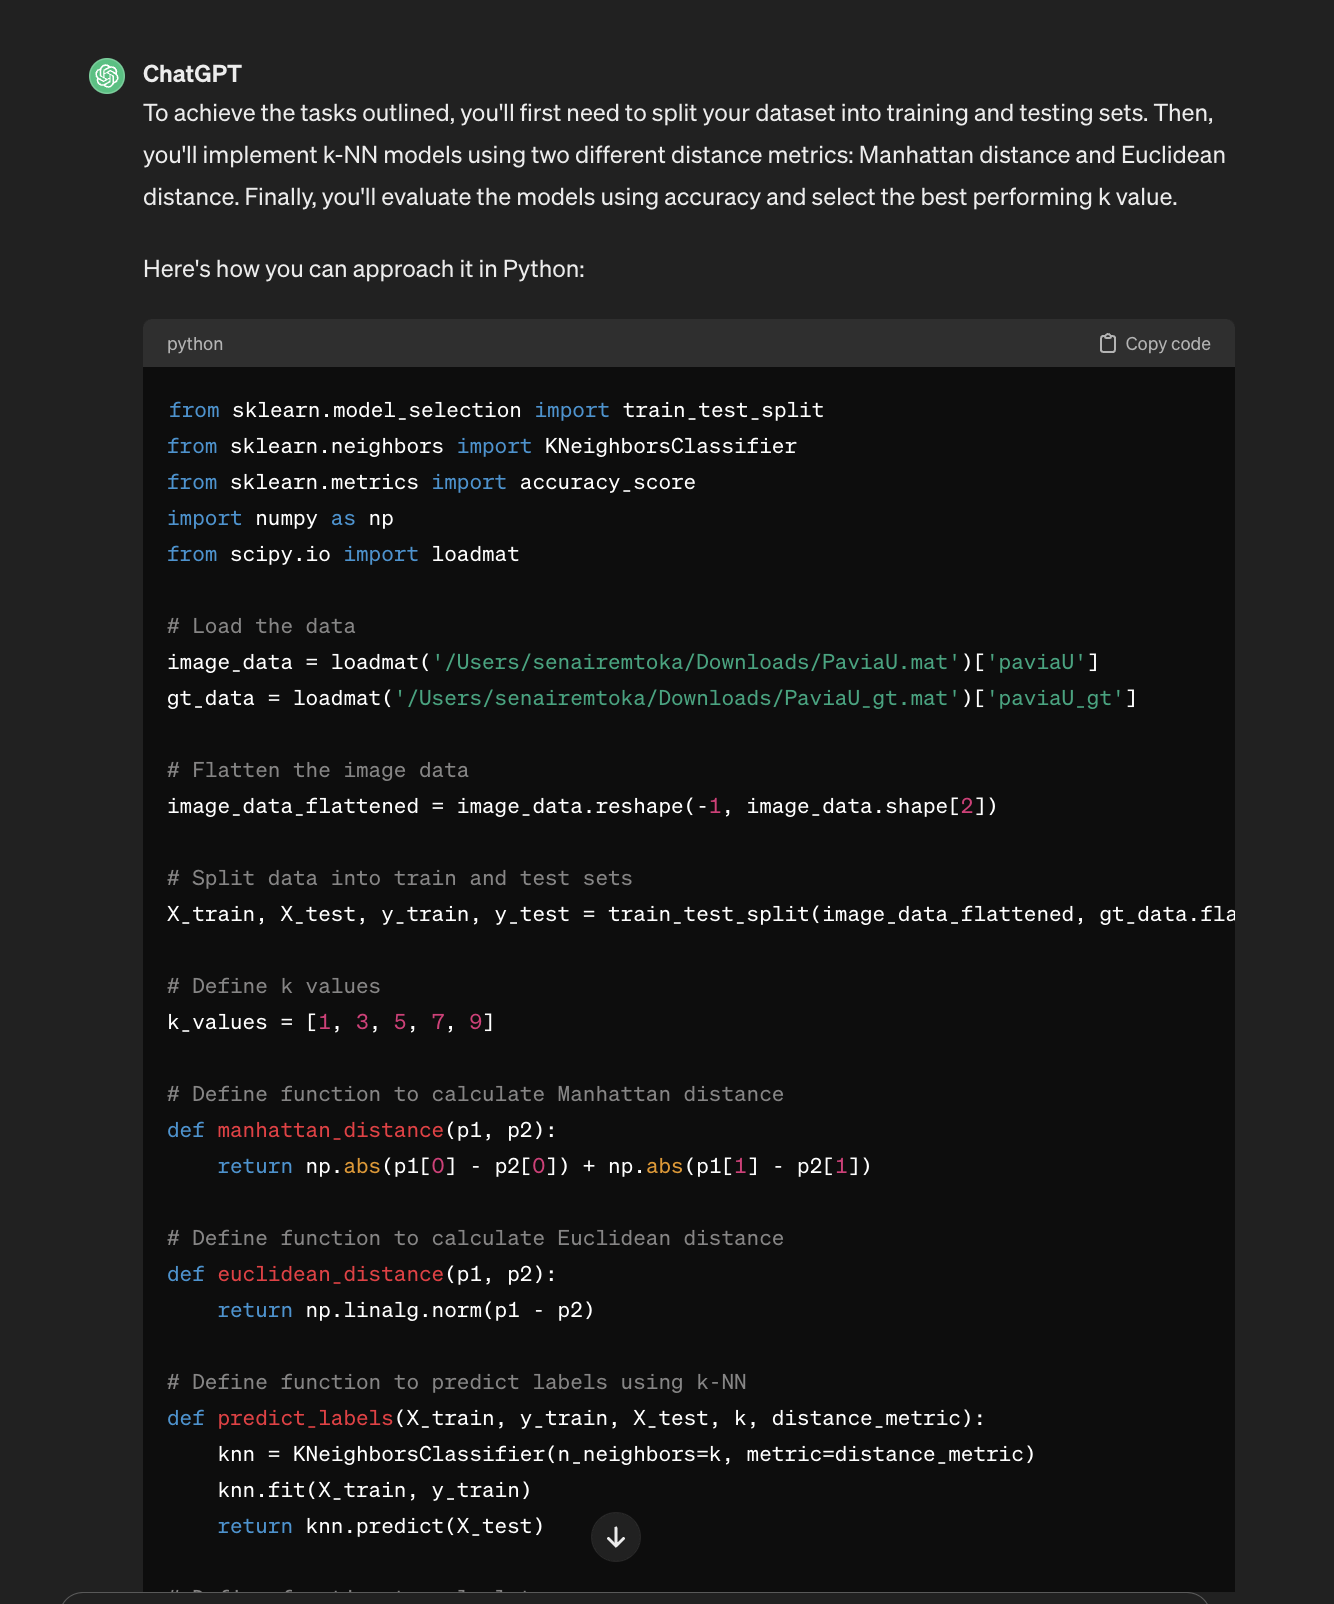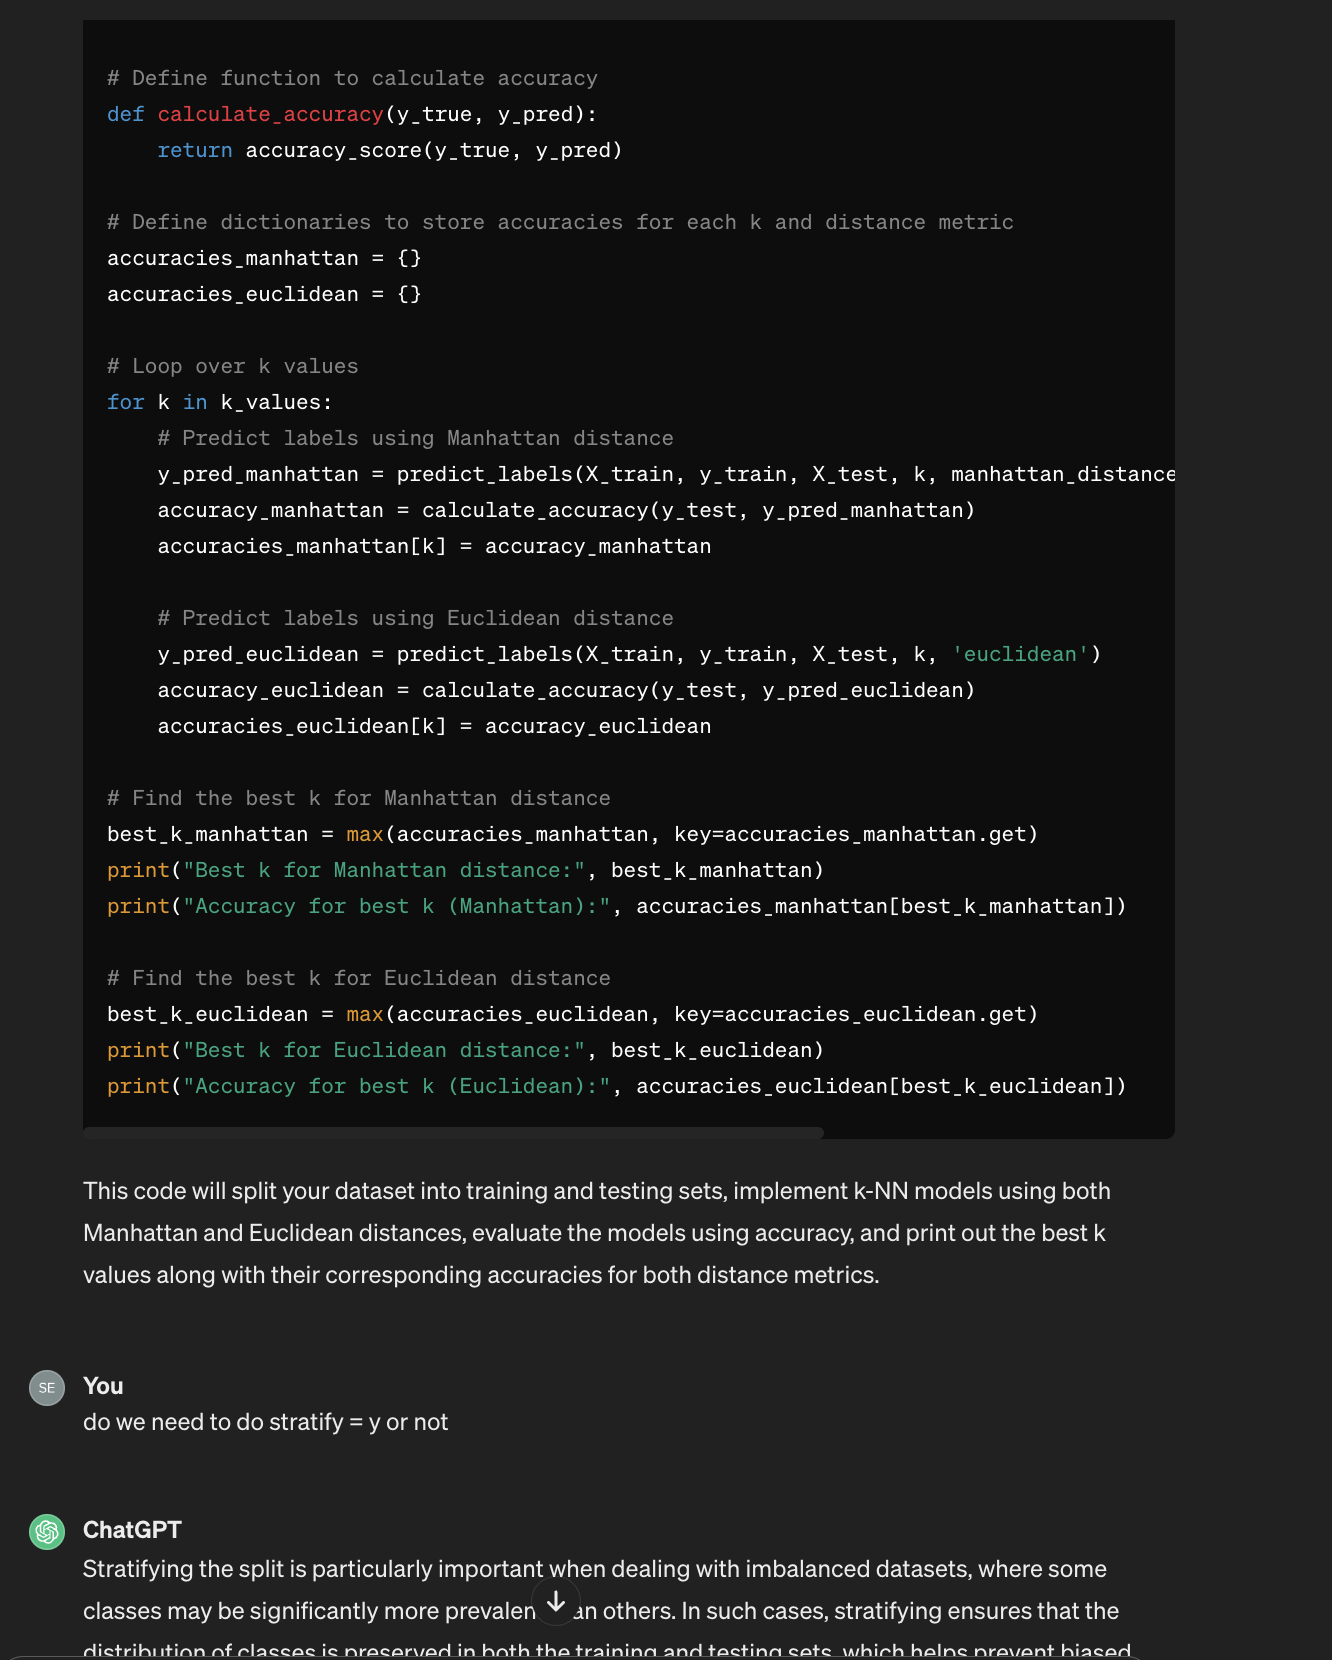



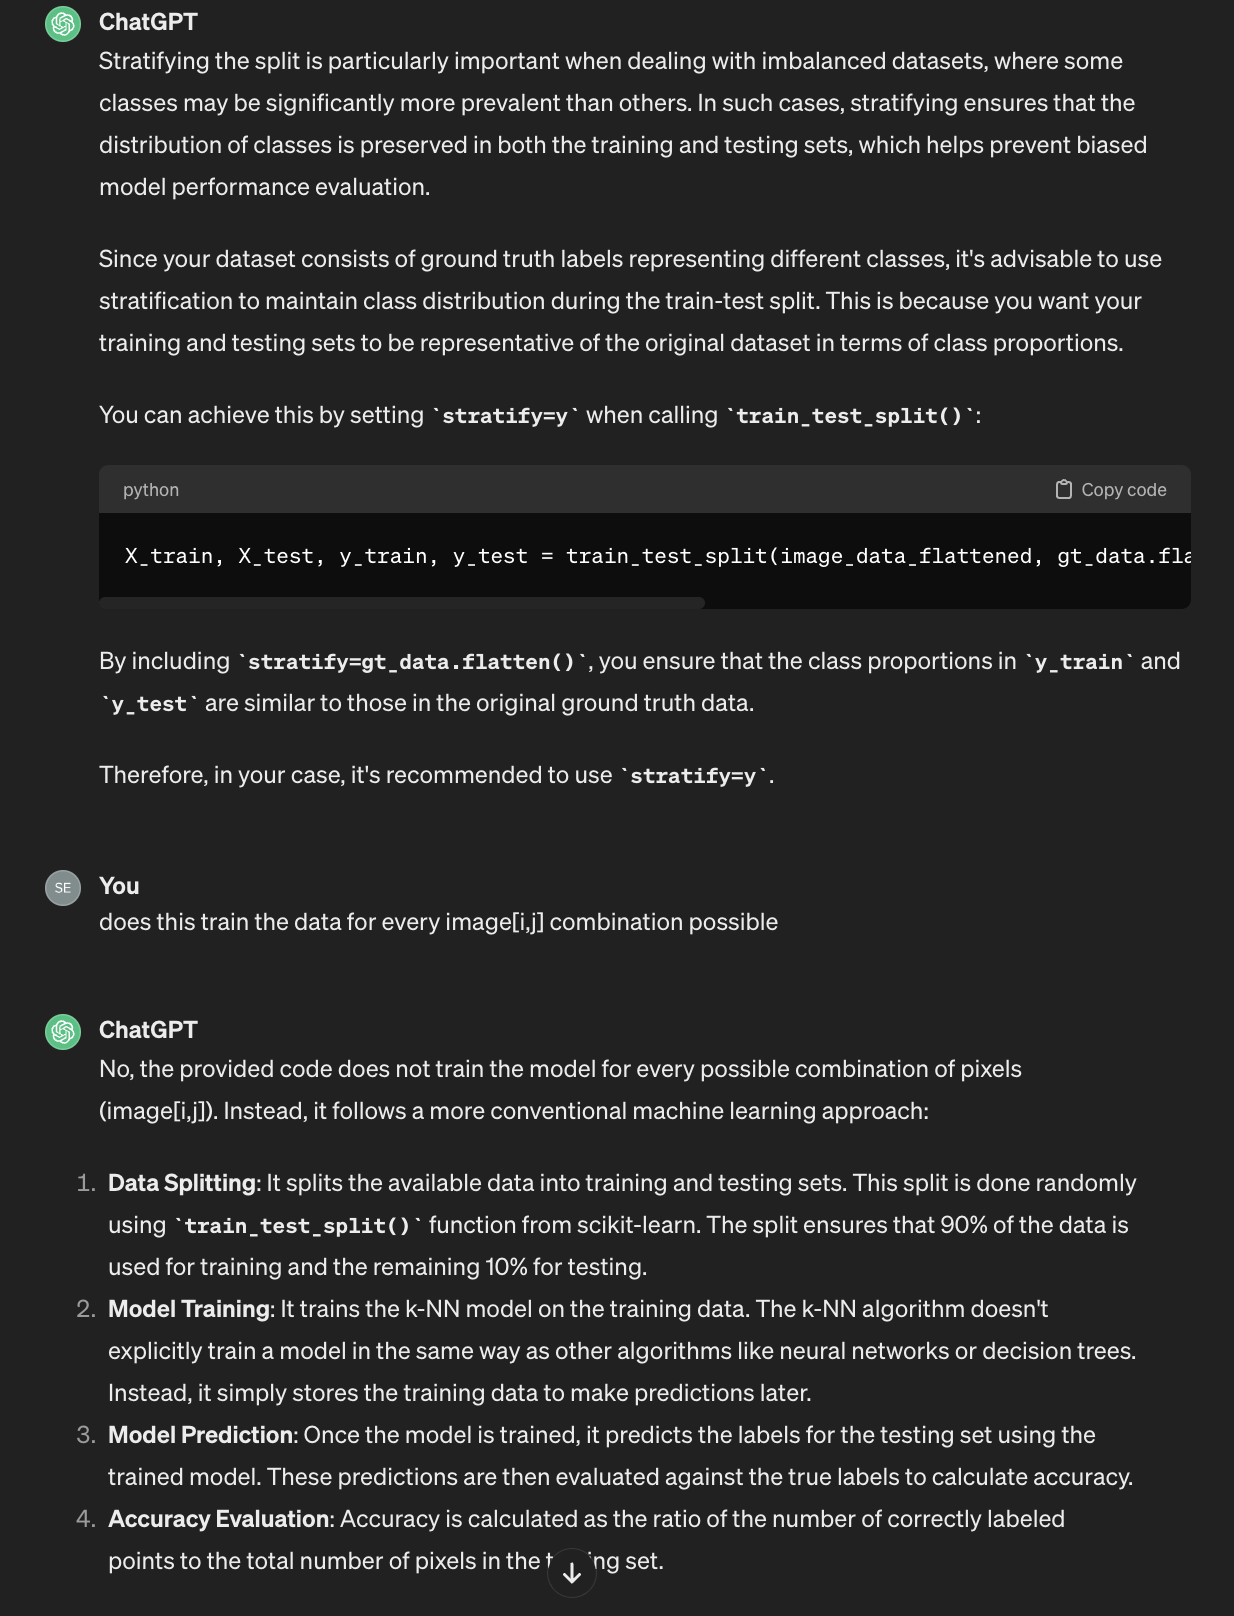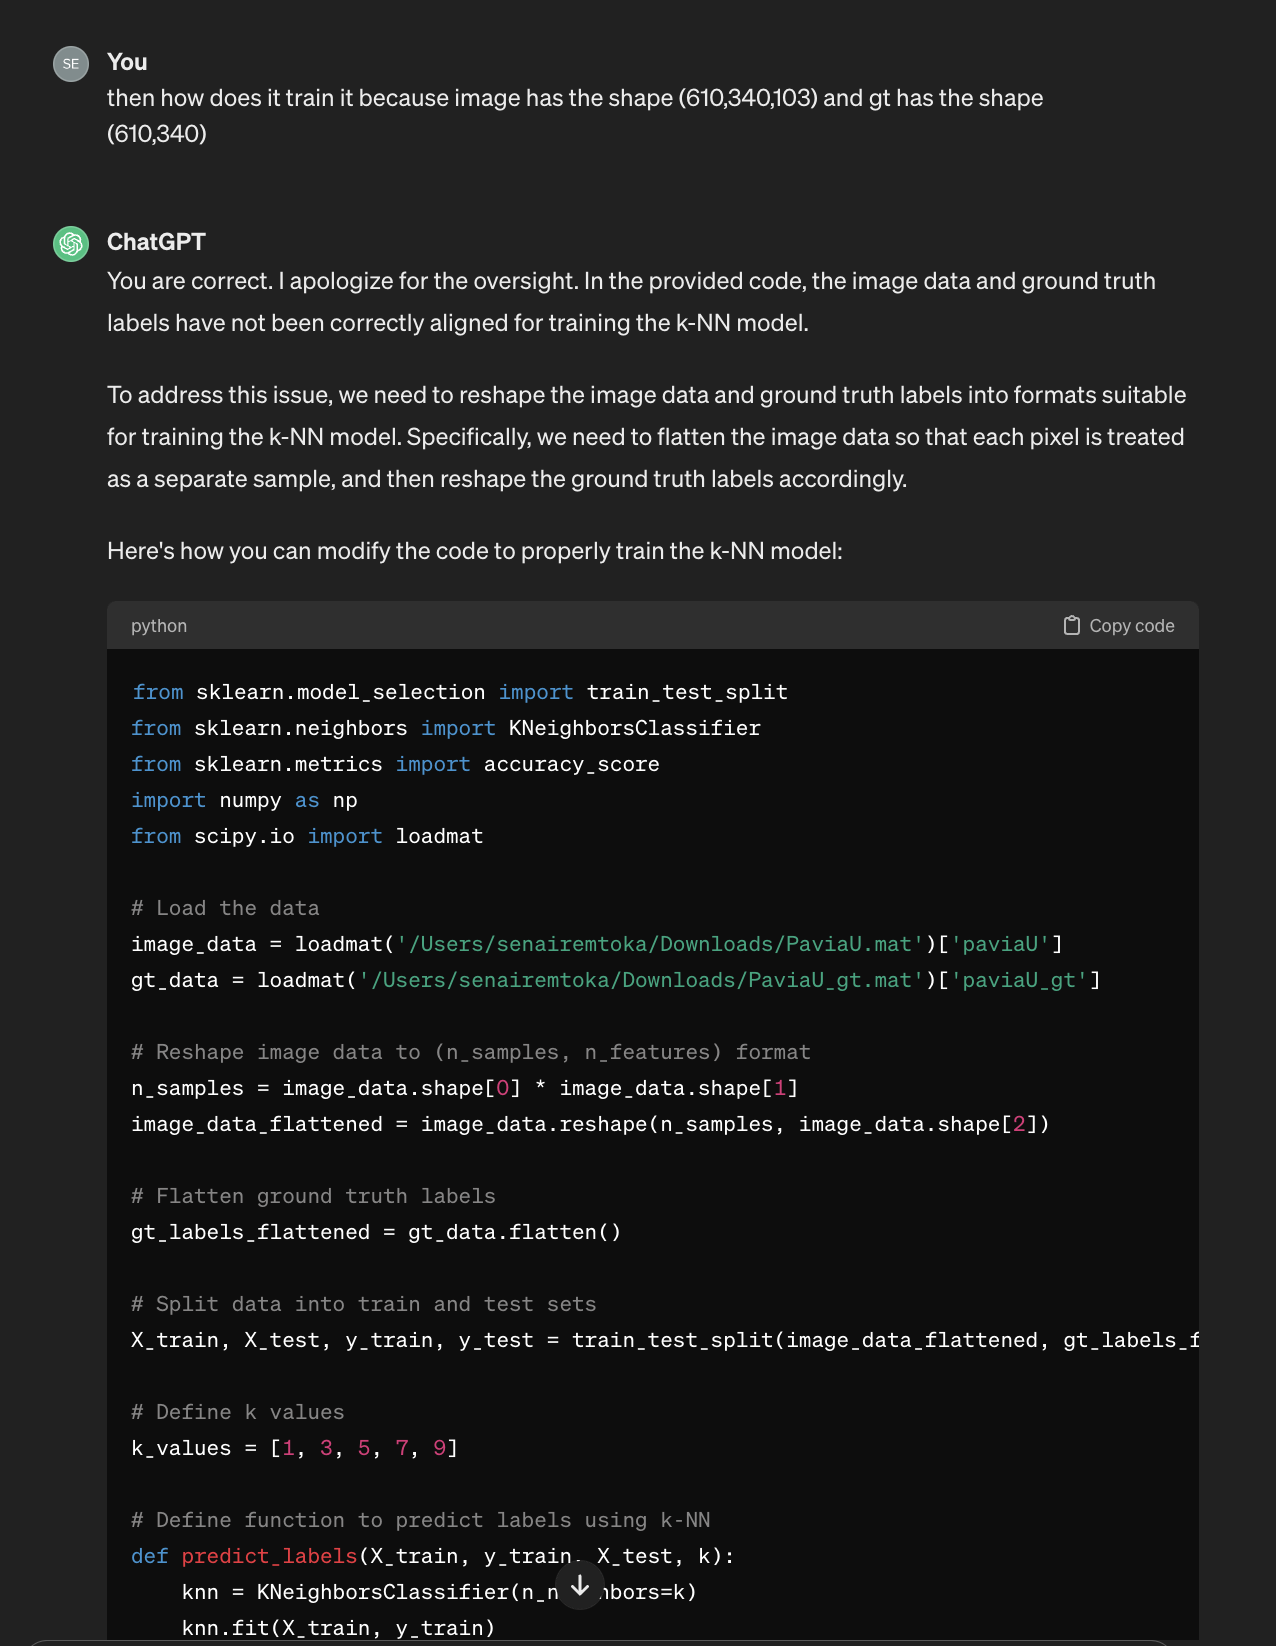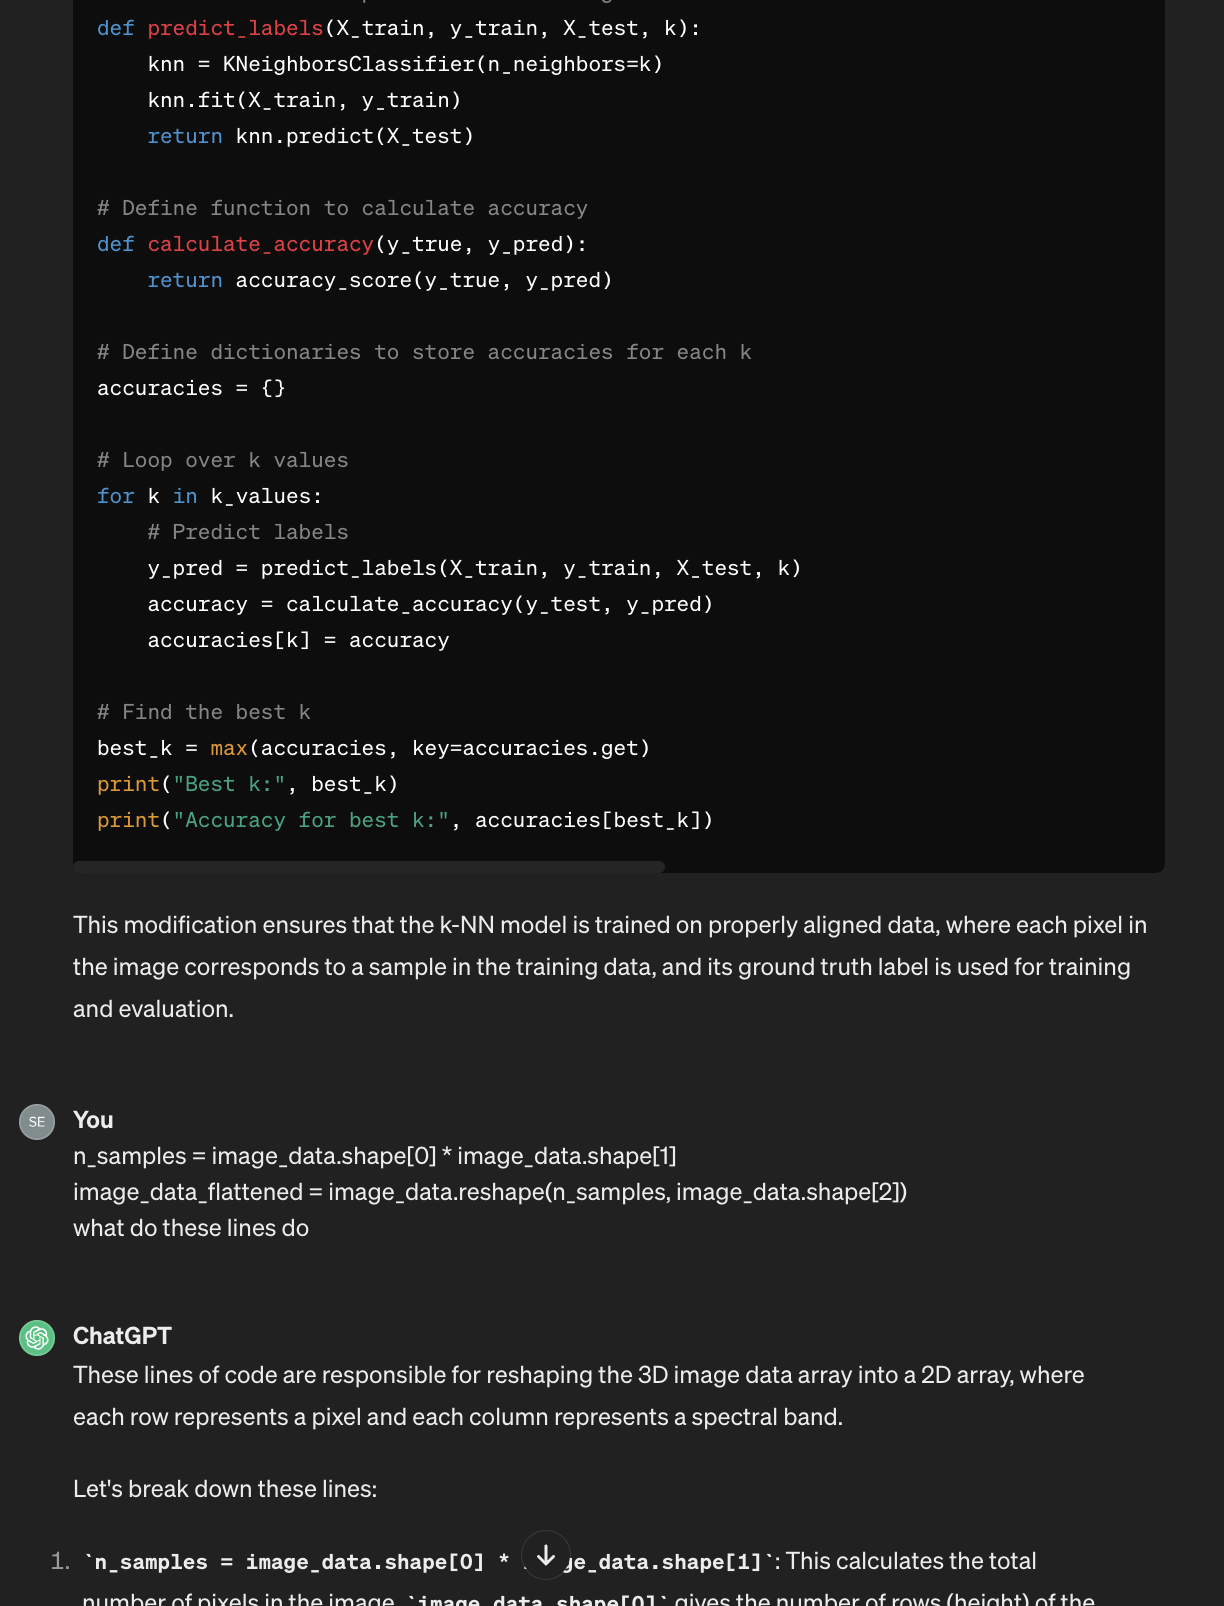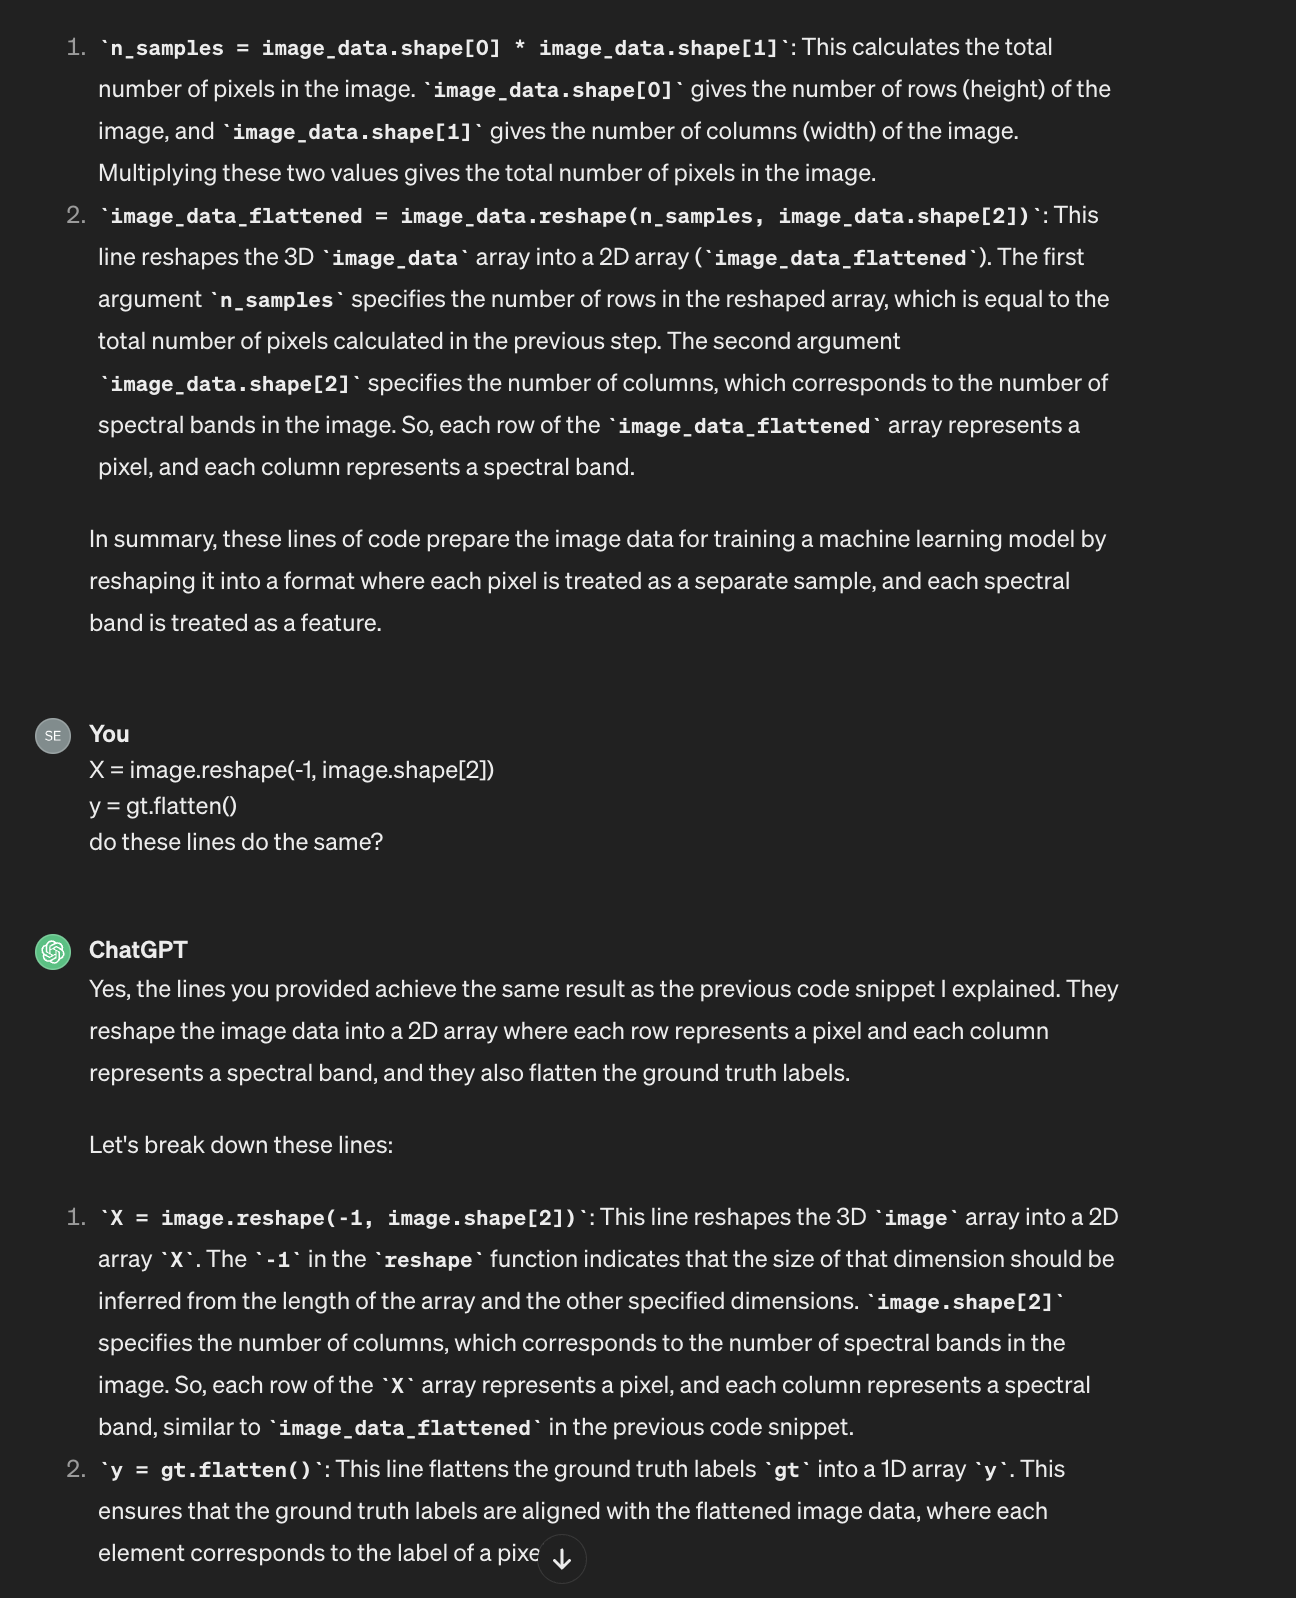